# Fit a transiting planet signal with a trapezoid model

Now, we'll use the photometry measurements we have just made for something exciting!

Monitoring the flux of a star might reveal the presence of a exoplanets when the planet "transits" across the front of the start as seen from our perspective. It causes a reduction of the apparent brightness of the star, and conducting large monitoring programs for the [transit method](https://en.wikipedia.org/wiki/Methods_of_detecting_exoplanets#Transit_photometry) has become one of the most successful methods to detect exoplanets.

We will use a simple model to describe the transit signal: a symmetric trapezoid. While it is geometrically simple, it is a non-linear model, that means you cannot write down a design matrix for it. So we need a more general minimizer to fit any given data. By the end of this notebook you will have all you need to fit transit data.

## Exercise 1

Write a function `read_data` that takes the object number (e.g. 7016.01) as an argument and returns two arrays: `time` and `flux`, read from the data file ('data/7016.01.txt').

In [75]:
import numpy as np
import matplotlib.pyplot as plt

In [76]:
def read_data(number):
    fname = 'data/' + str(number) + '.txt'
    time = np.loadtxt(fname=fname, usecols=0)
    flux = np.loadtxt(fname=fname, usecols=1)

    return time, flux

In [77]:
times, fluxes = read_data(7016.01)

Write a function `plot_data` that takes arrays for time and flux as arguments and plots time vs.
flux. Add axis labels. 

In [78]:
def plot_data(time, flux):
    plt.title('Flux vs Time')
    plt.scatter(time, flux)
    plt.xlabel('Time (s)')
    plt.ylabel('Flux (Jy)')
    plt.show()

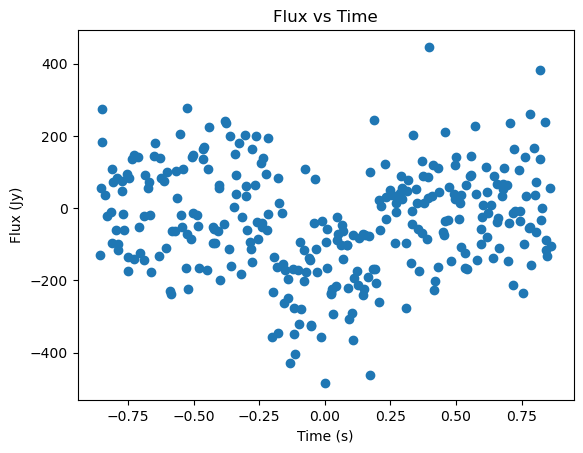

In [79]:
plot_data(times, fluxes)

## Exercise 2

Write a function `trapezoid` implementing the trapezoid model.  It should take four parameters:

* `delta` for the change in flux
* `T` for total duration
* `tau` for the ingress/egress duration
* `t0` for the central event time

and a time at which the trapezoid model is evaluated.

In [80]:
def trapezoid(delta, T, tau, t0, t):
    if (t < t0 - T/2): return 1
    elif (t < t0 - T/2 + tau): return 1 - delta * ((t - (t0 - T/2)) / tau)
    elif (t < t0 + T/2 - tau): return 1 - delta 
    elif (t < t0 + T/2): return 1 - delta * ((t0 + T/2 - t) / tau)
    return 1

To confirm that the model behaves as expected, make four different plots that show how the trapezoid shape changes when you vary each parameter independently (maybe 5 examples per plot).

In [81]:
t = np.linspace(-1, 1, 100)
delta, T, tau, t0 = [270, 1, 0.30, 0]
line = np.ones(len(t))

for i in range(len(t)):
    line[i] = trapezoid(delta, T, tau, t0, t[i])

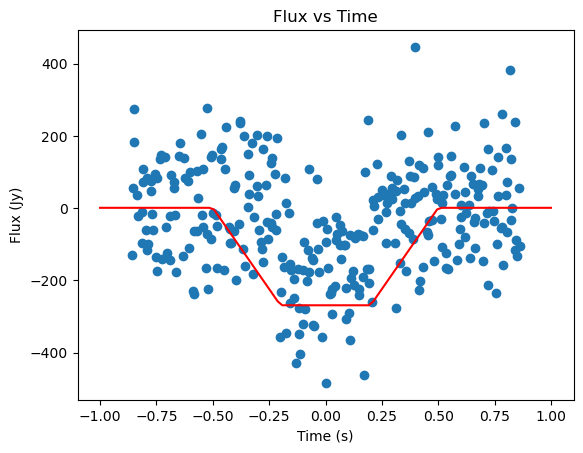

In [82]:
plt.title('Flux vs Time')
plt.scatter(times, fluxes)
plt.plot(t, line, color='red')
plt.xlabel('Time (s)')
plt.ylabel('Flux (Jy)')
plt.show()

## Exercise 3

Eyeball the plot of the actual 7016.01 transit signal, and try to guess what parameters might fit the data best.  Overplot the model on top of the data, and make a plot of the residuals (data - model) in a subplot.  Your
first guess doesn't have to be spot-on, the residuals should tell you where you're off the most.

In [83]:
model = np.ones(len(times))

for i in range(len(times)):
    model[i] = trapezoid(delta, T, tau, t0, times[i])

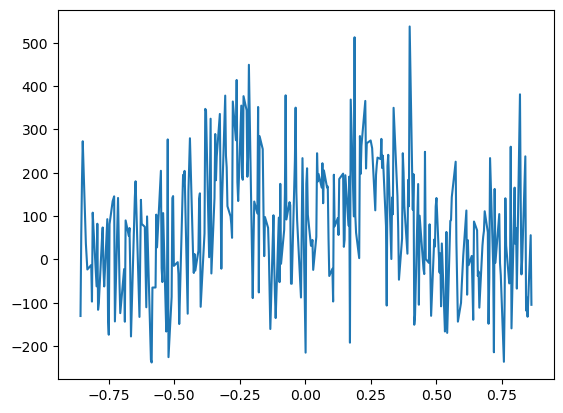

In [84]:
residuals = fluxes - model
plt.plot(times, residuals)

Use your best guess for the parameters to write a function `plot_fit` that takes the time and flux arrays and a parameter vector, and then makes the two plots: one with data and the  model, and another one with the residuals (i.e. data minus model).

## Exercise 4

Define the function `fit_trapezoid` that uses [scipy.optimize.minimize](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) to find the best-fit parameters for the 7016.01 data set, and display these results using `plot_fit`.

The function you want to minimize to find the "best-fit" parameters is the one that maximizes the likelihood. Since we're dealing with (assumed) Gaussian errors, this is the usual quadratic error form

$$
\chi^2(T,t_0,\tau,d;\ \lbrace (t_i,f_i) \rbrace) = \sum_i^N \frac{\left(f_i - \mathtt{trapezoid}(t_i;\ T,t_0,\tau,d)\right)^2}{\sigma_i^2},
$$

there $t_i$ and $f_i$ are the individual measurements of time and flux. The standard deviation of the measurements is $\sigma_i \approx 80$. 

Once you have the best-fit parameters, run `plot_fit` to visualize the result.

With these best-fit parameters, we could now proceed to determine the parameters of the planet, in particular its radius, but also its orbital parameters...